<a href="https://colab.research.google.com/github/navyadua/Student-Performance-Analyser/blob/main/STUDENT_PERFORMANCE_ANALYSER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv('https://raw.githubusercontent.com/navyadua/data/main/student-mat.csv')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


### EXPLORATORY DATA ANALYSIS

In [34]:
df.shape

(395, 33)

In [35]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [37]:
df.nunique()

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      34
G1            17
G2            17
G3            18
dtype: int64

In [38]:
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [39]:
backgrnd = pd.crosstab(index=df['G3'], columns=df['Pstatus'])

<Figure size 576x432 with 0 Axes>

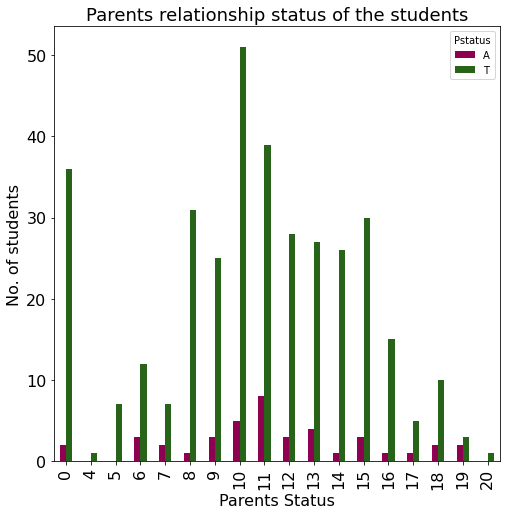

In [40]:
plt.figure(figsize=(8,6))
backgrnd.plot.bar(colormap="PiYG", fontsize=16, figsize=(8,8))
plt.title("Parents relationship status of the students", fontsize=18)
plt.xlabel("Parents Status", fontsize=16)
plt.ylabel("No. of students", fontsize=16)
plt.show()

In [41]:
outcome = pd.DataFrame(df.activities.value_counts())
outcome

,activities
yes,201
no,194


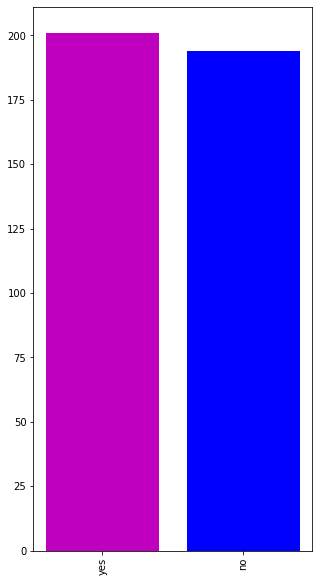

In [42]:
plt.figure(figsize=(5,10))
x = outcome.index
y = outcome.activities
plt.bar(x,y,color = ['m','b'])
plt.xticks(rotation=90)
plt.show()

<Figure size 432x288 with 0 Axes>

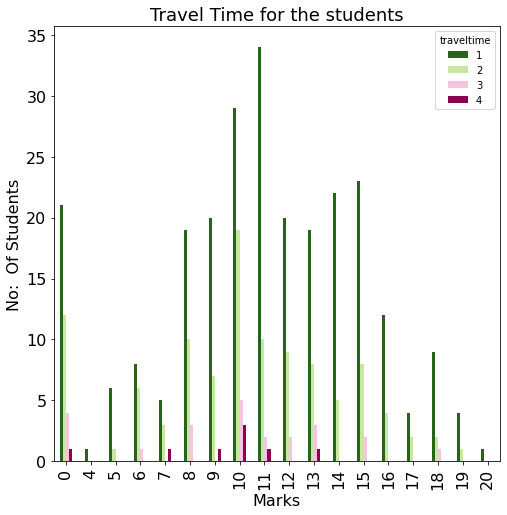

In [43]:
tt_student = pd.crosstab(index=df['G3'], columns=df['traveltime'])
plt.figure()
tt_student.plot.bar(colormap="PiYG_r", fontsize=16, figsize=(8,8))
plt.title("Travel Time for the students", fontsize=18)
plt.ylabel("No:  Of Students", fontsize=16)
plt.xlabel("Marks", fontsize=16)
plt.show()

In [44]:
pd.crosstab(index=df['G3'], columns=df['romantic'])

romantic,no,yes
G3,,
0,18,20
4,0,1
5,5,2
6,13,2
7,4,5
8,22,10
9,16,12
10,45,11
11,30,17


### CATEGORICAL VERIABLE ENCODING

In [45]:
df.loc[ df['Pstatus'] == 'A', 'Pstatus'] = 1
df.loc[ df['Pstatus'] == 'T', 'Pstatus'] = 2
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,1,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,2,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,2,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,2,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,2,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,1,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,2,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,2,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,2,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [46]:
df.loc[df['address'] == 'U', 'address'] = 2
df.loc[df['address'] == 'R', 'address'] = 1
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,2,GT3,1,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,2,GT3,2,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,2,LE3,2,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,2,GT3,2,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,2,GT3,2,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,2,LE3,1,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,2,LE3,2,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,1,GT3,2,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,1,LE3,2,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [47]:
df.loc[df['schoolsup'] == 'no', 'schoolsup'] = 1
df.loc[df['schoolsup'] == 'yes', 'schoolsup'] = 2
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,2,GT3,1,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,2,GT3,2,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,2,LE3,2,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,2,GT3,2,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,2,GT3,2,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,2,LE3,1,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,2,LE3,2,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,1,GT3,2,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,1,LE3,2,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [48]:
df.loc[df['famsup'] == 'no', 'famsup'] = 1
df.loc[df['famsup'] == 'yes', 'famsup'] = 2
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,2,GT3,1,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,2,GT3,2,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,2,LE3,2,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,2,GT3,2,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,2,GT3,2,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,2,LE3,1,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,2,LE3,2,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,1,GT3,2,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,1,LE3,2,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [49]:
df.loc[df['paid'] == 'yes', 'paid'] = 2
df.loc[df['paid'] == 'no', 'paid'] = 1
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,2,GT3,1,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,2,GT3,2,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,2,LE3,2,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,2,GT3,2,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,2,GT3,2,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,2,LE3,1,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,2,LE3,2,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,1,GT3,2,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,1,LE3,2,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [50]:
df.loc[df['internet'] == 'yes', 'internet'] = 2
df.loc[df['internet'] == 'no', 'internet'] = 1
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,2,GT3,1,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,2,GT3,2,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,2,LE3,2,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,2,GT3,2,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,2,GT3,2,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,2,LE3,1,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,2,LE3,2,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,1,GT3,2,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,1,LE3,2,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [51]:
df['average'] = (df['G1'] + df['G2'] + df['G3'])/3
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,average
0,GP,F,18,2,GT3,1,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,5.666667
1,GP,F,17,2,GT3,2,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,5.333333
2,GP,F,15,2,LE3,2,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,8.333333
3,GP,F,15,2,GT3,2,4,2,health,services,...,2,2,1,1,5,2,15,14,15,14.666667
4,GP,F,16,2,GT3,2,3,3,other,other,...,3,2,1,2,5,4,6,10,10,8.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,2,LE3,1,2,2,services,services,...,5,4,4,5,4,11,9,9,9,9.000000
391,MS,M,17,2,LE3,2,3,1,services,services,...,4,5,3,4,2,3,14,16,16,15.333333
392,MS,M,21,1,GT3,2,1,1,other,other,...,5,3,3,3,3,3,10,8,7,8.333333
393,MS,M,18,1,LE3,2,3,2,services,other,...,4,1,3,4,5,0,11,12,10,11.000000


In [52]:
df['sum'] = (df['G1'] + df['G2'] + df['G3'])
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,average,sum
0,GP,F,18,2,GT3,1,4,4,at_home,teacher,...,4,1,1,3,6,5,6,6,5.666667,17
1,GP,F,17,2,GT3,2,1,1,at_home,other,...,3,1,1,3,4,5,5,6,5.333333,16
2,GP,F,15,2,LE3,2,1,1,at_home,other,...,2,2,3,3,10,7,8,10,8.333333,25
3,GP,F,15,2,GT3,2,4,2,health,services,...,2,1,1,5,2,15,14,15,14.666667,44
4,GP,F,16,2,GT3,2,3,3,other,other,...,2,1,2,5,4,6,10,10,8.666667,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,2,LE3,1,2,2,services,services,...,4,4,5,4,11,9,9,9,9.000000,27
391,MS,M,17,2,LE3,2,3,1,services,services,...,5,3,4,2,3,14,16,16,15.333333,46
392,MS,M,21,1,GT3,2,1,1,other,other,...,3,3,3,3,3,10,8,7,8.333333,25
393,MS,M,18,1,LE3,2,3,2,services,other,...,1,3,4,5,0,11,12,10,11.000000,33


In [53]:
df['percentage'] = (df['G1'] + df['G2'] + df['G3'])/60*100
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1,G2,G3,average,sum,percentage
0,GP,F,18,2,GT3,1,4,4,at_home,teacher,...,1,1,3,6,5,6,6,5.666667,17,28.333333
1,GP,F,17,2,GT3,2,1,1,at_home,other,...,1,1,3,4,5,5,6,5.333333,16,26.666667
2,GP,F,15,2,LE3,2,1,1,at_home,other,...,2,3,3,10,7,8,10,8.333333,25,41.666667
3,GP,F,15,2,GT3,2,4,2,health,services,...,1,1,5,2,15,14,15,14.666667,44,73.333333
4,GP,F,16,2,GT3,2,3,3,other,other,...,1,2,5,4,6,10,10,8.666667,26,43.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,2,LE3,1,2,2,services,services,...,4,5,4,11,9,9,9,9.000000,27,45.000000
391,MS,M,17,2,LE3,2,3,1,services,services,...,3,4,2,3,14,16,16,15.333333,46,76.666667
392,MS,M,21,1,GT3,2,1,1,other,other,...,3,3,3,3,10,8,7,8.333333,25,41.666667
393,MS,M,18,1,LE3,2,3,2,services,other,...,3,4,5,0,11,12,10,11.000000,33,55.000000


In [54]:
df = pd.read_csv('https://raw.githubusercontent.com/navyadua/data/main/student_new.csv')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1,G2,G3,average,sum,percentage
0,GP,F,18,2,GT3,1,4,4,at_home,teacher,...,1,1,3,6,5,6,6,5.666667,17,28.33
1,GP,F,17,2,GT3,2,1,1,at_home,other,...,1,1,3,4,5,5,6,5.333333,16,26.67
2,GP,F,15,2,LE3,2,1,1,at_home,other,...,2,3,3,10,7,8,10,8.333333,25,41.67
3,GP,F,15,2,GT3,2,4,2,health,services,...,1,1,5,2,15,14,15,14.666670,44,73.33
4,GP,F,16,2,GT3,2,3,3,other,other,...,1,2,5,4,6,10,10,8.666667,26,43.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,2,LE3,1,2,2,services,services,...,4,5,4,11,9,9,9,9.000000,27,45.00
391,MS,M,17,2,LE3,2,3,1,services,services,...,3,4,2,3,14,16,16,15.333330,46,76.67
392,MS,M,21,1,GT3,2,1,1,other,other,...,3,3,3,3,10,8,7,8.333333,25,41.67
393,MS,M,18,1,LE3,2,3,2,services,other,...,3,4,5,0,11,12,10,11.000000,33,55.00


### Data Correlation with Heat Map

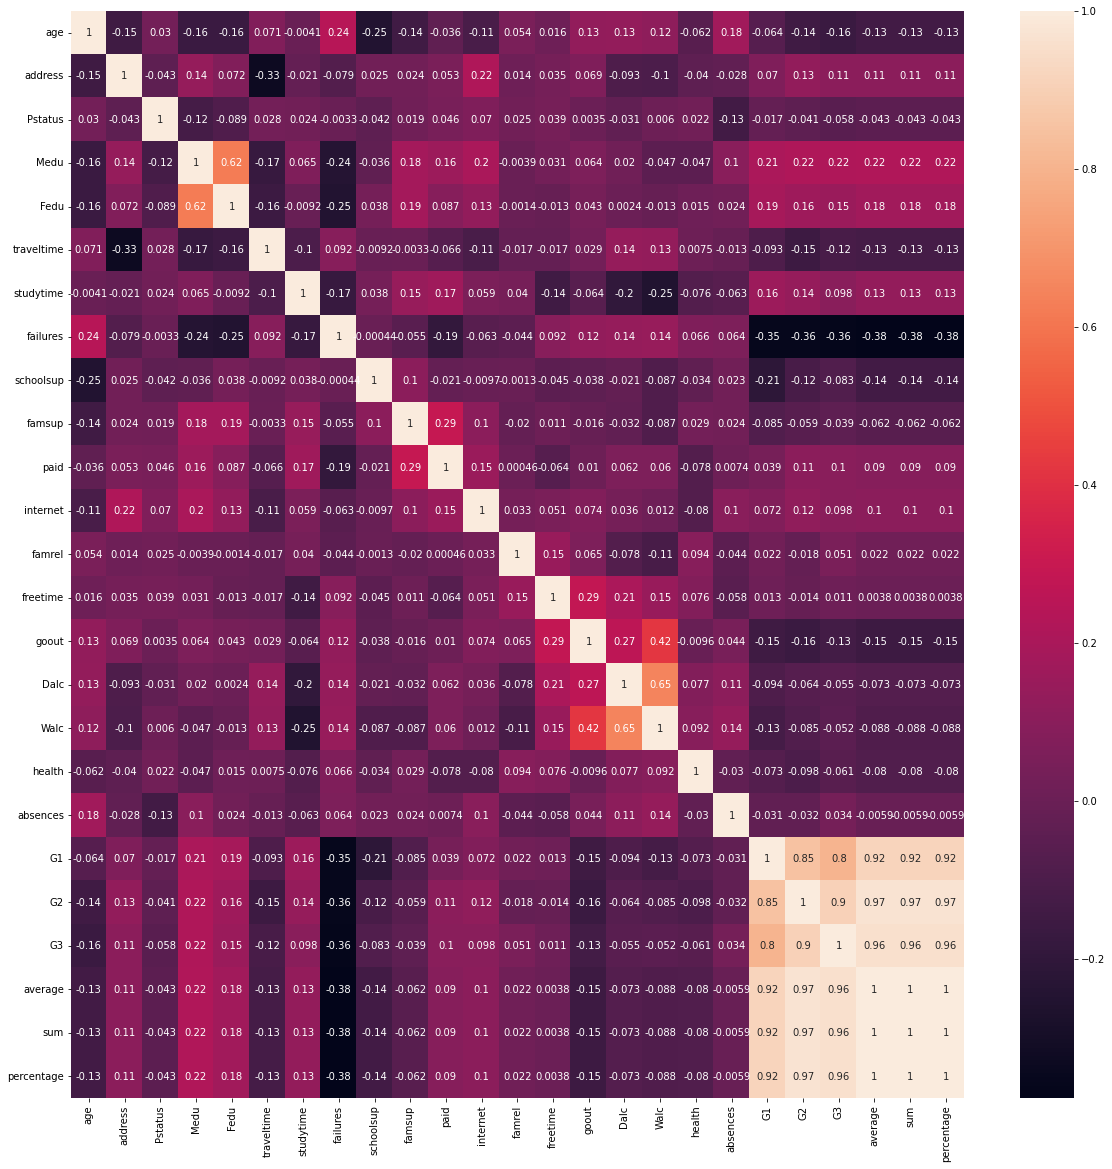

In [55]:
plt.figure(figsize = (20,20))
correlation_matrix = df.corr()
sns.heatmap(data=correlation_matrix, annot=True)

In [56]:
correlation_matrix

,age,address,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,...,Dalc,Walc,health,absences,G1,G2,G3,average,sum,percentage
age,1.000000,-0.146722,0.029598,-0.163658,-0.163438,0.070641,-0.004140,0.243665,-0.251811,-0.140609,...,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579,-0.134589,-0.134589,-0.134594
address,-0.146722,1.000000,-0.042572,0.138804,0.072178,-0.328096,-0.020912,-0.078578,0.024712,0.023903,...,-0.093494,-0.101126,-0.040355,-0.027874,0.069704,0.126037,0.105756,0.107297,0.107297,0.107301
Pstatus,0.029598,-0.042572,1.000000,-0.123565,-0.088730,0.028265,0.024294,-0.003339,-0.042238,0.019067,...,-0.030590,0.006045,0.022307,-0.134937,-0.016868,-0.041382,-0.058009,-0.043048,-0.043048,-0.043044
Medu,-0.163658,0.138804,-0.123565,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.036029,0.183727,...,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147,0.224260,0.224260,0.224268
Fedu,-0.163438,0.072178,-0.088730,0.623455,1.000000,-0.158194,-0.009175,-0.250408,0.037530,0.185496,...,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457,0.175852,0.175852,0.175858
traveltime,0.070641,-0.328096,0.028265,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.009246,-0.003286,...,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142,-0.128197,-0.128197,-0.128208
studytime,-0.004140,-0.020912,0.024294,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.037763,0.145228,...,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820,0.134565,0.134565,0.134568
failures,0.243665,-0.078578,-0.003339,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.000437,-0.055075,...,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415,-0.375759,-0.375759,-0.375770
schoolsup,-0.251811,0.024712,-0.042238,-0.036029,0.037530,-0.009246,0.037763,-0.000437,1.000000,0.104681,...,-0.021485,-0.087152,-0.034124,0.022526,-0.212607,-0.117385,-0.082788,-0.137644,-0.137644,-0.137643
famsup,-0.140609,0.023903,0.019067,0.183727,0.185496,-0.003286,0.145228,-0.055075,0.104681,1.000000,...,-0.031575,-0.086688,0.029297,0.024353,-0.084569,-0.059166,-0.039157,-0.061553,-0.061553,-0.061550


In [57]:
corr_mat = df.corr()
sorted_mat = corr_mat.unstack().sort_values()
val = sorted_mat.to_frame()
val.reset_index(drop=False, inplace=True)
values = val[val.level_0 == 'average'] 
positive = values[values[0] > 0.05] 
print(positive.level_1.values)
positive

['paid' 'internet' 'address' 'studytime' 'Fedu' 'Medu' 'G1' 'G3' 'G2'
 'percentage' 'sum' 'average']


,level_0,level_1,0
426,average,paid,0.089511
451,average,internet,0.102628
464,average,address,0.107297
489,average,studytime,0.134565
527,average,Fedu,0.175852
550,average,Medu,0.224260
576,average,G1,0.919386
586,average,G3,0.959873
590,average,G2,0.967999
595,average,percentage,1.000000


In [58]:
negative = values[values[0] < -0.05]
print(negative.level_1.values)
negative

['failures' 'goout' 'schoolsup' 'age' 'traveltime' 'Walc' 'health' 'Dalc'
 'famsup']


,level_0,level_1,0
4,average,failures,-0.375759
42,average,goout,-0.154511
62,average,schoolsup,-0.137644
70,average,age,-0.134589
80,average,traveltime,-0.128197
110,average,Walc,-0.088025
131,average,health,-0.080380
148,average,Dalc,-0.072508
167,average,famsup,-0.061553


### K- Means Clustering

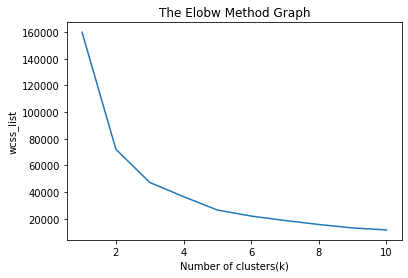

In [59]:
# importing libraries    
import numpy as nm    
import matplotlib.pyplot as mtp    
import pandas as pd 
import seaborn as sns  
# G1,G2,G3 
# Importing the dataset  
dataset = pd.read_csv('https://raw.githubusercontent.com/navyadua/data/main/student_new.csv')
x = dataset.iloc[:, [29,35]].values
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS

#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 0)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
mtp.plot(range(1, 11), wcss_list)  
mtp.title('The Elobw Method Graph')  
mtp.xlabel('Number of clusters(k)')  
mtp.ylabel('wcss_list')  
mtp.show()  

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-pack

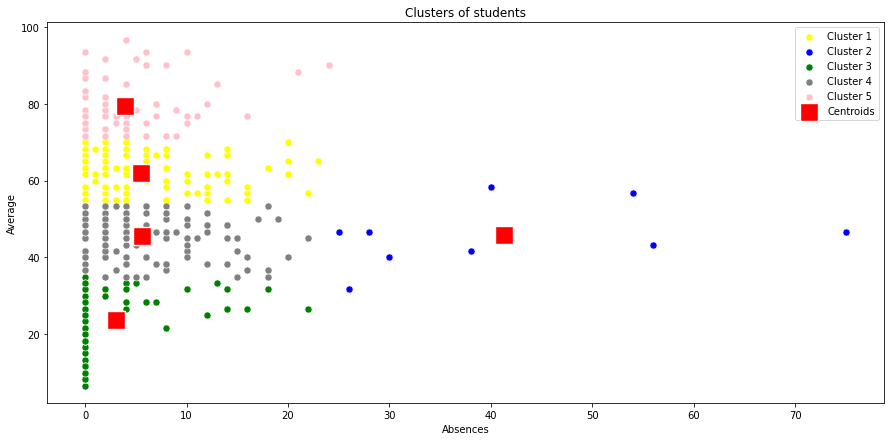

In [60]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x)

# Visualising the clusters
mtp.figure(figsize=(15,7))
sns.scatterplot(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], color = 'pink', label = 'Cluster 5',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', label = 'Centroids',s=300,marker=',')
mtp.grid(False)
mtp.title('Clusters of students')
mtp.xlabel('Absences')
mtp.ylabel('Average')
mtp.legend()
mtp.show()

In [61]:
import pandas as pd
import random
from sklearn.cluster import KMeans

X = pd.read_csv('https://raw.githubusercontent.com/navyadua/data/main/student_new.csv')
corr_columns = ['paid' , 'internet' , 'address',  'studytime', 'traveltime', 'Walc','health','average']
df = pd.DataFrame(X, columns=corr_columns)

kmeans = KMeans(n_clusters=5 , random_state = 990)

y = kmeans.fit_predict(df.values)

df['Cluster'] = y

df

,paid,internet,address,studytime,traveltime,Walc,health,average,Cluster
0,1,1,2,2,2,1,3,5.666667,2
1,1,2,2,2,1,1,3,5.333333,2
2,2,2,2,2,1,3,3,8.333333,3
3,2,2,2,3,1,1,5,14.666670,1
4,2,1,2,2,1,2,5,8.666667,3
...,...,...,...,...,...,...,...,...,...
390,2,1,2,2,1,5,4,9.000000,3
391,1,2,2,1,2,4,2,15.333330,1
392,1,1,1,1,1,3,3,8.333333,3
393,1,2,1,1,3,4,5,11.000000,0


In [77]:
import random
df_col = dataset[corr_columns]
n = random.randint(0,394)
args = (df_col.loc[[n]])
args

,paid,internet,address,studytime,traveltime,Walc,health,average
0,1,1,2,2,2,1,3,5.666667


In [78]:
cluster = {0:'Good',1:'Excellent',2:'Can be Improved',3:'Sufficient',4:'Satisfactory'}
import numpy as np
prediction = kmeans.predict(args)
print("It belongs to",cluster.get(prediction[0]) , "cluster")

It belongs to Can be Improved cluster


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
